## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import operator

from numpy import linalg as la
from copy import deepcopy
from sklearn.metrics.cluster import contingency_matrix


## Calculate Eigen values and vectors

In [2]:
def calculate_eigens(df):
    #finding atttr_wise(col_wise) mean and std
    mn = np.mean(df)
    std = np.std(df)
    #normalizing data to (0-1) range
    normalised = (df - mn)/std
    #finding covariance matrix to make mat of order(attr * attr)
    cov_mat = np.cov(normalised.T)
    #calculating eval and evec
    evalue,evec = la.eig(cov_mat)
    return evalue,evec,normalised

## Selecting  dimensions with 10% tolerance using PCA

In [3]:
def select_dimensions(mydict,evalue,evec,ndata):
    #storing eval,evec in dict as key-value
    for i in range (len(evalue)) :
        mydict[evalue[i]] = evec[i]
    
    #summing evalues 
    evalue_sum = sum(evalue)
    #print(evalue_sum)
    
    #sorting evalues in decreasing order 
    evalue_sorted = sorted(evalue, reverse = True)
    
    min_val = .90
    curr_val = 0
    
    #sel_dimensions list till tolerance becomes less than 0.1
    dim_list = []
    
    
    for i in range (len(evalue_sorted)) :
        #while curr_tolerance is less than .9, include dimension in dim_list
        curr_val = curr_val + evalue_sorted[i]/evalue_sum
        dim_list.append(mydict[evalue_sorted[i]])
        if curr_val > 0.9 :
            break
        
    #final reduced dimensions 
    dim_list = np.asarray(dim_list)
    dim_list = dim_list.T
    dimensions = np.dot(ndata,dim_list)
    
#     print(ndata.shape, dim_list.shape, dimensions.shape)
    
    #final reduced data is of dimensions (rows * reduced_attr)
    return dimensions
       

## K-means on Reduced Dimensions

In [4]:
def k_means(k,dimensions) :
    rows = dimensions.shape[0]
    cols = dimensions.shape[1]
    
    mn = np.mean(dimensions, axis = 0)
    std = np.std(dimensions, axis = 0)
    centers = np.random.randn(k,cols)*std + mn
    
#     plt.scatter(centers[:,0], centers[:,1], marker='+', c='r', s=150)
    
    # to store old centers
    co = np.zeros(centers.shape)
    # to Store new centers
    cn = deepcopy(centers) 

    clusters = np.zeros(rows)
    distances = np.zeros((rows,k))

    error = np.linalg.norm(cn - co)

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0:
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(dimensions - cn[i], axis=1)
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)

        co = deepcopy(cn)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            cn[i] = np.mean(dimensions[clusters == i], axis=0)
        error = np.linalg.norm(cn - co)
    # centers_new   
    plt.scatter(cn[:,0], cn[:,1], marker='+', c='g', s=150)
#     print(clusters)
#     print(np.unique(clusters))
    
    #
    cmat=contingency_matrix(clusters,lclass)
#     print(cmat)

    for i,item in enumerate(cmat):
        print("Purity of clusters :",i," :", max(item)*100/sum(item))
    
    pure=0
    for row in cmat:
#         print(max(row))
        pure+=max(row)
    purity=pure/len(label)
    
    return purity
    

## Reading data from files

Reduced Dimensions : 14
Purity of clusters : 0  : 46.7283316204
Purity of clusters : 1  : 98.1628815276
Purity of clusters : 2  : 86.2802586077
Purity of clusters : 3  : 65.4545454545
Purity of clusters : 4  : 72.3366686286
K-means Purity is: 0.838627090167


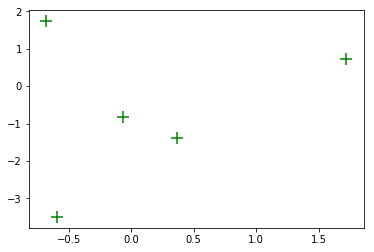

In [5]:
df = pd.read_csv('intrusion_detection/data.csv') 
label = df['xAttack']
df = df.drop(['xAttack'],axis =1)

#calculating eigens values and vectors
evalue,evec,ndata = calculate_eigens(df)

#store e_val,evec in dict as key-value
mydict = {}

#selecting dimensions wtih 10% tolerance
dimensions = select_dimensions(mydict,evalue,evec,ndata)
print('Reduced Dimensions :',dimensions.shape[1])


#converting unique vals of label [xAttack] attr into integer categories
uv = np.unique(label)
# print(uv)
cat = [0,1,2,3,4]
#converted label data into int class list 
lclass=[]
for i in range(len(label)):
    if label[i]=='dos':
        lclass.append(cat[0])
    if label[i]=='normal':
        lclass.append(cat[1])
    if label[i]=='probe':
        lclass.append(cat[2])
    if label[i]=='r2l':
        lclass.append(cat[3])
    if label[i]=='u2r':
        lclass.append(cat[4])
# print(lclass)


# kmeans on reduced dimenasions
k = 5
purity = k_means(k,dimensions)
print('K-means Purity is:', purity)
